In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
import sys
from contextlib import redirect_stdout

In [47]:
%store -r qwen_results
%store -r mistral_results
%store -r llama_results
%store -r gemma_results
%store -r deepseek_results
%store -r test_case_result

In [48]:
questions=[
    "What was the average active power consumption in March 2007?",
    "What hour of the day had the highest power usage on Christmas 2006?",
    "Compare energy usage (Global_active_power) on weekdays vs weekends.",
    "Find days where total energy consumption exceeded 5 kWh.",
    "Plot the energy usage trend for the first week of January 2007.",
    "Find the average voltage for each day of the first week of February 2007.",
    "What is the correlation between global active power and sub-metering values?",
    "What is the correlation between global active power and sub-metering values?. Can you show it using visualization",
    "Plot the energy usage trend for the first week of January 2007. Can you aggregate data by day"
]

In [49]:
print(qwen_results.values())

dict_values([0, 1, 0, 1, 1, 1, 0, 1, 1])


In [50]:
print(mistral_results.values())

dict_values([1, 0, 1, 1, 1, 1, 1, 1, 1])


In [51]:
print(llama_results.values())

dict_values([0, 1, 1, 0, 1, 1, 1, 1, 1])


In [52]:
print(gemma_results.values())

dict_values([1, 0, 1, 1, 1, 1, 1, 0, 0])


In [53]:
print(deepseek_results.values())

dict_values([1, 0, 1, 1, 0, 1, 1, 1, 0])


In [54]:
print(test_case_result.values())

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1])


In [55]:
# Prepare the data
data = {
    'Questions': questions,
    'Test Case': list(test_case_result.values()),
    'Qwen': list(qwen_results.values()),
    'Mistral': list(mistral_results.values()),
    'Llama': list(llama_results.values()),
    'Gemma': list(gemma_results.values()),
    'DeepSeek': list(deepseek_results.values())
}

In [56]:
df = pd.DataFrame(data)
print(df)

                                           Questions  Test Case  Qwen  \
0  What was the average active power consumption ...          1     0   
1  What hour of the day had the highest power usa...          1     1   
2  Compare energy usage (Global_active_power) on ...          1     0   
3  Find days where total energy consumption excee...          1     1   
4  Plot the energy usage trend for the first week...          1     1   
5  Find the average voltage for each day of the f...          1     1   
6  What is the correlation between global active ...          1     0   
7  What is the correlation between global active ...          1     1   
8  Plot the energy usage trend for the first week...          1     1   

   Mistral  Llama  Gemma  DeepSeek  
0        1      0      1         1  
1        0      1      0         0  
2        1      1      1         1  
3        1      0      1         1  
4        1      1      1         0  
5        1      1      1         1  
6        1

In [57]:
# Calculate performance metrics
performance = pd.DataFrame({
    'Model': ['Qwen', 'Mistral', 'Llama', 'Gemma', 'DeepSeek'],
    'Correct': [
        sum(df['Qwen']),
        sum(df['Mistral']),
        sum(df['Llama']),
        sum(df['Gemma']),
        sum(df['DeepSeek'])
    ],
    'Incorrect': [
        len(questions) - sum(df['Qwen']),
        len(questions) - sum(df['Mistral']),
        len(questions) - sum(df['Llama']),
        len(questions) - sum(df['Gemma']),
        len(questions) - sum(df['DeepSeek'])
    ],
    'Accuracy': [
        sum(df['Qwen'])/len(questions),
        sum(df['Mistral'])/len(questions),
        sum(df['Llama'])/len(questions),
        sum(df['Gemma'])/len(questions),
        sum(df['DeepSeek'])/len(questions)
    ]
})

In [58]:
# 1. Display question vs model results table
print("Question vs Model Results:")
display(df)

Question vs Model Results:


,Questions,Test Case,Qwen,Mistral,Llama,Gemma,DeepSeek
0,What was the average active power consumption ...,1,0,1,0,1,1
1,What hour of the day had the highest power usa...,1,1,0,1,0,0
2,Compare energy usage (Global_active_power) on ...,1,0,1,1,1,1
3,Find days where total energy consumption excee...,1,1,1,0,1,1
4,Plot the energy usage trend for the first week...,1,1,1,1,1,0
5,Find the average voltage for each day of the f...,1,1,1,1,1,1
6,What is the correlation between global active ...,1,0,1,1,1,1
7,What is the correlation between global active ...,1,1,1,1,0,1
8,Plot the energy usage trend for the first week...,1,1,1,1,0,0


In [59]:
# 2. Display performance metrics table
print("\nPerformance Metrics:")
display(performance)


Performance Metrics:


,Model,Correct,Incorrect,Accuracy
0,Qwen,6,3,0.666667
1,Mistral,8,1,0.888889
2,Llama,7,2,0.777778
3,Gemma,6,3,0.666667
4,DeepSeek,6,3,0.666667


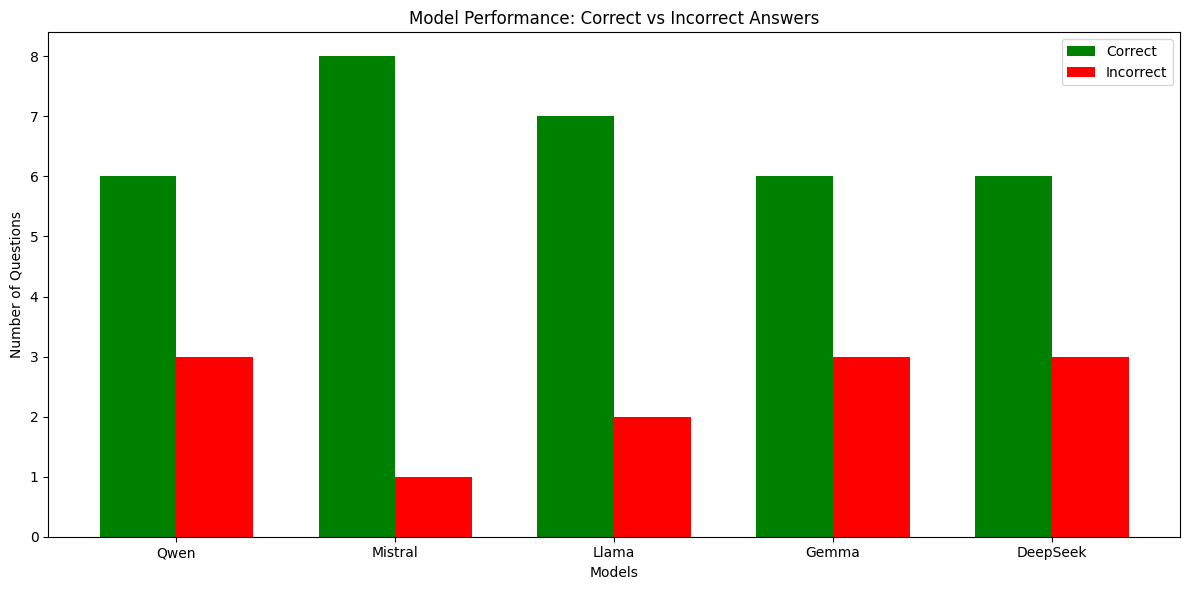

In [72]:
# 3. Visualization - Correct vs Incorrect by Model
plt.figure(figsize=(12, 6))

# Bar positions
bar_width = 0.35
index = np.arange(len(performance['Model']))

# Create bars
plt.bar(index, performance['Correct'], bar_width, label='Correct', color='green')
plt.bar(index+bar_width, performance['Incorrect'], bar_width, label='Incorrect', color='red')

# Formatting
plt.xlabel('Models')
plt.ylabel('Number of Questions')
plt.title('Model Performance: Correct vs Incorrect Answers')
plt.xticks(index + bar_width/2, performance['Model'])
plt.legend()
plt.tight_layout()
plt.show()

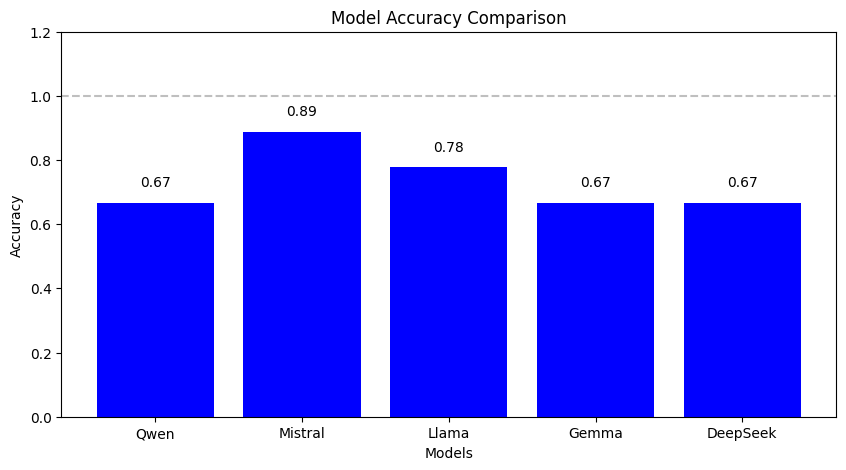

In [80]:
# 4. Visualization - Accuracy by Model
plt.figure(figsize=(10, 5))
plt.bar(performance['Model'], performance['Accuracy'], color='blue')
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)  # Perfect score line
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.2)
for i, v in enumerate(performance['Accuracy']):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
plt.show()

In [62]:
print("\nModel Ranking by Accuracy:")
display(performance.sort_values('Accuracy', ascending=False))


Model Ranking by Accuracy:


,Model,Correct,Incorrect,Accuracy
1,Mistral,8,1,0.888889
2,Llama,7,2,0.777778
0,Qwen,6,3,0.666667
3,Gemma,6,3,0.666667
4,DeepSeek,6,3,0.666667
